#### ATTRACTIONS EXTRACTION PROCESS

This notebook was used to execute manually the scripts to scrape all of the usa most popular touristic attractions.

From the scrapping.py file we import scrape_state_attractions, this function takes a state and the corresponding url and returns a pandas dataframe with each state's touristic attractions:

- attributes
- scores

The data was scrapped from the [Tripadvisor.com](https://www.tripadvisor.com.ar/) web, from a page like this: [tripadvisor/attractions/california/.com](https://www.tripadvisor.com.ar/Attractions-g28926-Activities-oa0-California.html).

In [25]:
import sys
import scrapping
import pandas as pd

sys.path.append('../files/lib')
import personalised_graphics

usa_cities = pd.read_csv("../files/data/usa_cities.csv")
usa_states = pd.read_csv("../files/data/usa_states.csv")

"""# This functions takes a state_id and executes the scrapping process
def scrape(state_id: list):
    state = state=usa_states["state"][usa_states["state_id"] == state_id].iloc[0]
    hotels = pd.read_csv(f"../data/booking/{state}_hotels.csv")
    hotels_attributes = scrapping.scrap_state_attractions(hotels["reviews_url"].tolist())
    personalised_graphics.missing_values_heatmap(hotels_attributes, f"{state}_hotels_attributes scrape result") # explore data
    return hotels_attributes"""

Cannot find header.dxf (GDAL_DATA is not defined)


'# This functions takes a state_id and executes the scrapping process\ndef scrape(state_id: list):\n    state = state=usa_states["state"][usa_states["state_id"] == state_id].iloc[0]\n    hotels = pd.read_csv(f"../data/booking/{state}_hotels.csv")\n    hotels_attributes = scrapping.scrap_state_attractions(hotels["reviews_url"].tolist())\n    personalised_graphics.missing_values_heatmap(hotels_attributes, f"{state}_hotels_attributes scrape result") # explore data\n    return hotels_attributes'

west pacific

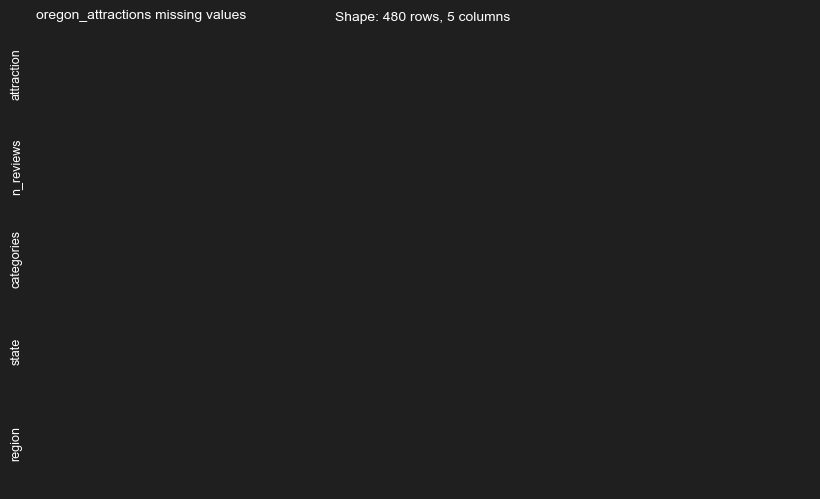

In [24]:
west_pacific = [["Alaska", "https://www.tripadvisor.com.ar/Attractions-g28923-Activities-oa0-Alaska.html"],
                ["Hawaii", "https://www.tripadvisor.com.ar/Attractions-g29217-Activities-oa0-Island_of_Hawaii_Hawaii.html"],
                ["California", "https://www.tripadvisor.com.ar/Attractions-g28926-Activities-oa0-California.html"],
                ["Oregon", "https://www.tripadvisor.com.ar/Attractions-g1438848-Activities-oa0-Oregon_Coast_Oregon.html"],
                ["Washington", "https://www.tripadvisor.com.ar/Attractions-g28968-Activities-oa0-Washington.html"]]

west_pacific_attractions = pd.DataFrame()
for state in west_pacific:
    state_attributes = scrapping.scrap_state_attractions(state[0], state[1], report=False)
    west_pacific_attractions = pd.concat([west_pacific_attractions, state_attributes], ignore_index=True)

# Transform
west_pacific_attractions['attraction'] = west_pacific_attractions['attraction'].str.replace(r'^\d+\.\s*', '', regex=True) # Process attraction
west_pacific_attractions['categories'] = west_pacific_attractions['categories'].str.replace(' • ', ', ') # Process categories

west_pacific_attractions["region"] = "west pacific"

# Explore and export
personalised_graphics.missing_values_heatmap(west_pacific_attractions, "oregon_attractions")
west_pacific_attractions.to_csv("../files/data/tripadvisor/west_pacific_attractions.csv")